In [4]:
pip install scikit-learn

  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl (46.2 MB)
Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


   Runtime (min)  Runtime (min)_scaled
0            124             -0.501164
1            125             -0.438040
2            126             -0.374917
3            124             -0.501164
4            112             -1.258649


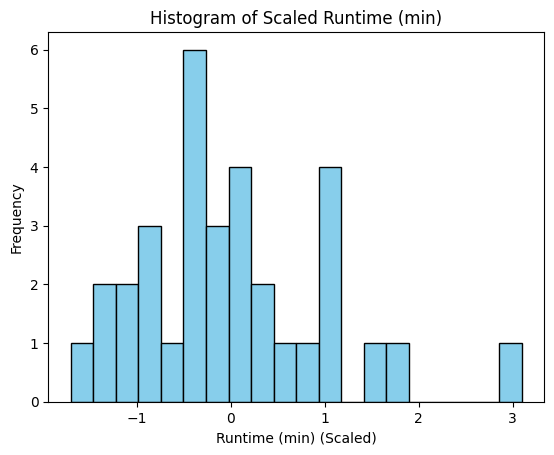

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv(r'C:\Users\Loong\Desktop\MCU Movies.csv')

# 选择要缩放的数字特征
numeric_feature = "Runtime (min)"

# 初始化标准缩放器
scaler = StandardScaler()

# 对选择的特征进行Z-оценку缩放
data[numeric_feature + "_scaled"] = scaler.fit_transform(data[[numeric_feature]])

# 打印缩放后的数据
print(data[[numeric_feature, numeric_feature + "_scaled"]].head())

# 绘制Z-оценka缩放后的特征的直方图
plt.hist(data[numeric_feature + "_scaled"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel(numeric_feature + " (Scaled)")
plt.ylabel('Frequency')
plt.title('Histogram of Scaled ' + numeric_feature)
plt.show()

Index(['Runtime (min)'], dtype='object')


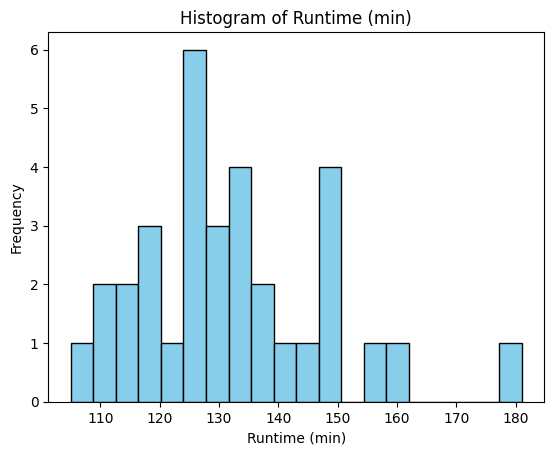

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv(r'C:\Users\Loong\Desktop\MCU Movies.csv')

# 处理包含货币符号的列，将其转换为浮点数
currency_columns = ["Production Budget", "Box Office (Local)", "Box Office (International)", "Total Box Office Earnings"]
for col in currency_columns:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

# 选择要进行特征选择的特征和目标
X = data.drop(["Movie Title", "Release Date (USA)", "Phase", "Genre", "Movie Rating", "Lead Role",
               "Production Budget", "Box Office (Local)", "Box Office (International)",
               "Total Box Office Earnings", "Rotten Tomatoes Ratings (%)", "IMDb Ratings"], axis=1)
y = data["Total Box Office Earnings"]

# 初始化特征选择器
selector = SelectKBest(score_func=mutual_info_regression, k=min(10, X.shape[1]))

# 执行特征选择
X_selected = selector.fit_transform(X, y)

# 打印选定的特征
selected_features = X.columns[selector.get_support(indices=True)]
print(selected_features)

# 绘制特征选择后的特征的直方图
for feature in selected_features:
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + feature)
    plt.show()